<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


<h1>Extracting Stock Data Using a Python Library</h1>


A company's stock share is a piece of the company more precisely:

<p><b>A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This
entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." [1]</p></b>

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day the stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges.

<p>You are a data scientist working for a hedge fund; it's your job to determine any suspicious stock activity. In this lab you will extract stock data using a Python library. We will use the <coode>yfinance</code> library, it allows us to extract data for stocks returning data in a pandas dataframe. You will use the lab to extract.</p>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Using yfinance to Extract Stock Info</li>
        <li>Using yfinance to Extract Historical Share Price Data</li>
        <li>Using yfinance to Extract Historical Dividends Data</li>
        <li>Exercise</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [1]:
#!pip install yfinance
#!pip install pandas

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Using the yfinance Library to Extract Stock Data


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.


In [3]:
apple = yf.Ticker("AAPL")

Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.


### Stock Info


Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.


In [4]:
apple_info=apple.info
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 147000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store, that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with on-demand r

We can get the <code>'country'</code> using the key country


In [5]:
apple_info['country']

'United States'

### Extracting Share Price


A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


In [6]:
apple_share_price_data = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [7]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100600,0.101037,0.100600,0.100600,469033600,0.0,0.0
1980-12-15,0.095789,0.095789,0.095352,0.095352,175884800,0.0,0.0
1980-12-16,0.088790,0.088790,0.088353,0.088353,105728000,0.0,0.0
1980-12-17,0.090540,0.090977,0.090540,0.090540,86441600,0.0,0.0
1980-12-18,0.093165,0.093602,0.093165,0.093165,73449600,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [8]:
apple_share_price_data.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:


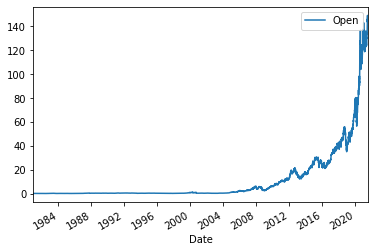

In [9]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends


Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history\` function.


In [10]:
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2020-08-07    0.205000
2020-11-06    0.205000
2021-02-05    0.205000
2021-05-07    0.220000
2021-08-06    0.220000
Name: Dividends, Length: 72, dtype: float64

We can plot the dividends overtime:


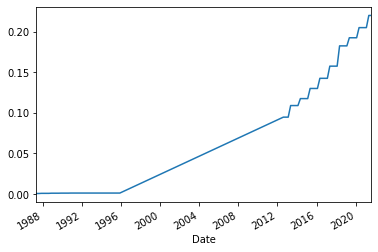

In [11]:
apple.dividends.plot()

## My assets


In [12]:
#!pip install yahoofinancials

In [13]:
from datetime import date

from yahoofinancials import YahooFinancials

In [14]:
# construct a data frame with the information regarding my stocks

assets = ['TSLA', 'NIO', 'RDS-B', 'TTE', 'PTR', 'XPEV', 'BABA', 'SLB']

yahoo_financials = YahooFinancials(assets)

data = yahoo_financials.get_historical_price_data(start_date='2020-01-01', 
                                                  end_date='2021-07-28', 
                                                  time_interval='daily')

prices_df = pd.DataFrame({
    a: {x['formatted_date']: x['adjclose'] for x in data[a]['prices']} for a in assets
})

In [15]:
prices_df.XPEV.replace(np.nan, 0, inplace = True)

In [16]:
prices_df['total'] = prices_df.sum(axis = 1)

In [17]:
#number of stocks
n_stocks = {'TSLA':1.98, 'NIO':145.5, 'RDS-B':56.7, 'TTE':31, 'PTR':28, 'XPEV':0, 'BABA':6.056, 'SLB':25}

In [18]:
prices_df['Oil&Gas'] = prices_df['RDS-B'] + prices_df['TTE'] + prices_df['PTR']+ prices_df['SLB']
prices_df['EVs'] = prices_df['TSLA'] + prices_df['XPEV'] + prices_df['NIO']
prices_df['Retail']=prices_df['BABA']

In [19]:
prices_df

,TSLA,NIO,RDS-B,TTE,PTR,XPEV,BABA,SLB,total,Oil&Gas,EVs,Retail
2020-01-02,86.052002,3.720000,60.680000,49.209320,46.345779,0.000000,219.770004,38.487980,504.265086,194.723080,89.772002,219.770004
2020-01-03,88.601997,3.830000,61.330002,49.387390,46.808235,0.000000,217.000000,38.861649,505.819273,196.387276,92.431997,217.000000
2020-01-06,90.307999,3.680000,61.980000,50.313347,48.395111,0.000000,216.639999,39.110764,510.427219,199.799221,93.987999,216.639999
2020-01-07,93.811996,3.240000,61.520000,50.028435,47.932652,0.000000,217.630005,38.909554,513.072642,198.390640,97.051996,217.630005
2020-01-08,98.428001,3.390000,60.910000,49.725719,46.944256,0.000000,218.000000,37.759800,515.157777,195.339775,101.818002,218.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-21,655.289978,46.770000,37.150002,42.349998,42.860001,43.869999,211.080002,28.430000,1107.799980,150.790001,745.929977,211.080002
2021-07-22,649.260010,46.070000,37.009998,42.250000,43.230000,43.270000,214.039993,27.980000,1103.110001,150.469997,738.600010,214.039993
2021-07-23,643.380005,43.990002,36.779999,42.029999,42.240002,41.000000,206.529999,28.410000,1084.360004,149.459999,728.370007,206.529999
2021-07-26,657.619995,43.169998,38.070000,43.290001,42.049999,40.750000,191.759995,29.459999,1086.169987,152.869999,741.539993,191.759995


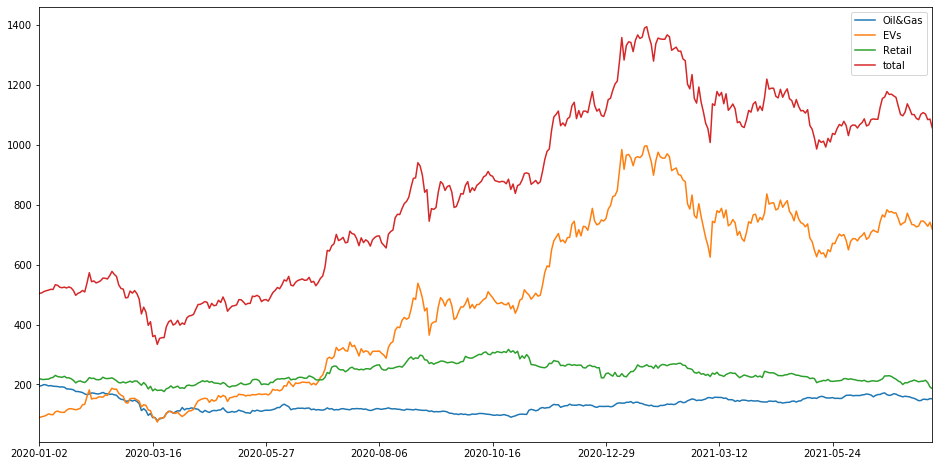

In [20]:
# plot the breakdown of my assets by category
prices_df[['Oil&Gas', 'EVs', 'Retail', 'total']].plot(figsize = (16,8))
plt.show()

### Consider the holdings of each stock  

In [21]:
holdings = prices_df[['Oil&Gas', 'EVs', 'Retail', 'total']]

In [22]:
holdings['Oil&Gas_H'] = prices_df['RDS-B']*n_stocks['RDS-B'] + prices_df['TTE']*n_stocks['TTE']+ prices_df['PTR']*n_stocks['PTR']+ prices_df['SLB']*n_stocks['SLB']
holdings['EVs_H'] = prices_df['TSLA']*n_stocks['TSLA'] + prices_df['NIO']*n_stocks['NIO']+ prices_df['XPEV']*n_stocks['XPEV']
holdings['Retail_H'] = prices_df['BABA']*n_stocks['BABA']
holdings['total_H'] = holdings['Oil&Gas_H'] + holdings['EVs_H']+holdings['Retail_H']

C:\Users\M.Amer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\M.Amer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\M.Amer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [23]:
holdings_clean = holdings.drop(['Oil&Gas', 'EVs', 'Retail', 'total'], axis =1)


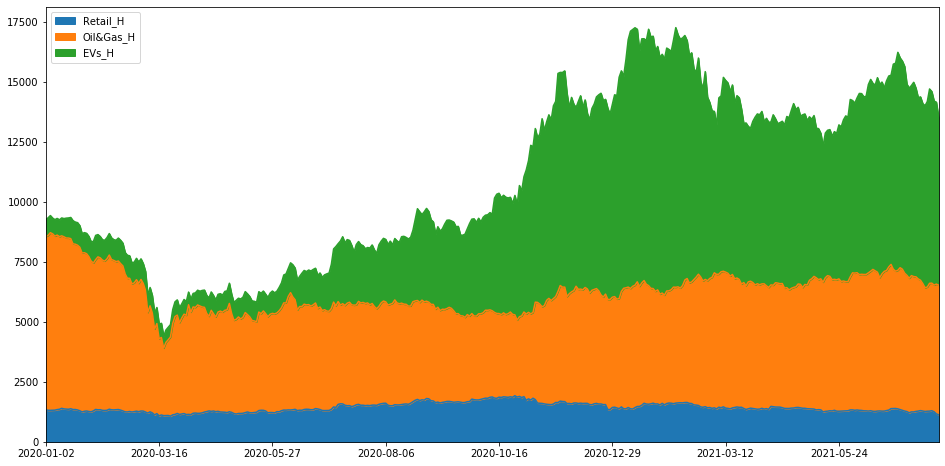

In [24]:
# plot the breakdown of my assets by category
holdings_clean[['Retail_H','Oil&Gas_H','EVs_H']].plot(figsize = (16,8), kind = 'area')
plt.show()

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
